# Проект по анализу данных

## Общая информация

Дата выдачи: 22.03.2016

Согласование состава группы и набора данных: 27.03.2016 23:59

Срок сдачи первой части: 10.04.2016 23:59

Срок сдачи второй части: 10 дней до даты защиты проекта

### О задании
В рамках курса "Интеллектуальный анализ данных" помимо выполнения контрольных и практических заданий вам также нужно выполнить проект. За каждый модуль ставится отдельная оценка. В этом модуле вам предстоит познакомиться с данными, сделать их описание, поискать закономерности. В следующем модуле вы продолжите работу с этими данными, но уже будете строить непосредственные модели, работающие с ними. 

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. 

**Сдавать задание после указанного срока сдачи нельзя.** При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Можно присылать предварительные версии отчетов для комментариев со стороны проверяющих.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все. К тому же недоступность виртуальной машины не является уважительной причиной для продления дедлайна.

Обратите внимание, что на устном зачете в конце семестра некотоые вопросы могут быть связаны с проектом.

**!Не выдавайте наружу «грязный» отчет: объяснения должны быть понятно сформулированы, а код лаконичен, откомментирован и исполняем!**

### Доп. баллы
Если вы обнаружите что-то интересное в данных, либо у вас есть идеи как можно работать с данным датасетом — присылайте, это будет поощряться дополнительными баллами. Кроме того, вы можете выступить со своим личным исследованием на семинаре, это также не останется незамеченным.

### Формат сдачи
При отправлении Проекта на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br/>
** [Майнор ИАД 2016] *{Фамилия}* *{Имя}* ПРОЕКТ-ЧАСТЬ{1 или 2}* **<br/>

### Список возможных источников данных
* UC Irvine Machine Learning Repository
* http://www.kaggle.com/competitions, например [1](https://www.kaggle.com/c/digit-recognizer), [2](https://www.kaggle.com/c/sf-crime), [3](https://www.kaggle.com/c/random-acts-of-pizza), [4](https://www.kaggle.com/c/telstra-recruiting-network)
* http://www.openml.org/
* http://www-stat.stanford.edu/~tibs/ElemStatLearn/
* http://lib.stat.cmu.edu/datasets
* http://www.statsci.org/datasets.html
* http://www.amstat.org/publications/jse/jse_data_archive.htm
* http://www.physionet.org/physiobank/database
* http://biostat.mc.vanderbilt.edu/twiki/bin/view/Main/DataSets.
* https://github.com/caesar0301/awesome-public-datasets
* http://data.gov.ru/

[Краткий(!) пример анализа](https://www.dropbox.com/s/o18vntu6fa5ht9v/example.zip?dl=0)

# Общий план проекта
## Часть 1

* Описание набора данных и признаков с визуализацией - 0.5 балла
* Постановка задачи. Что предсказываем? Зачем? - 0.5 балла
* Первичный анализ признаков. Типы шкал. Пропуски значений  - 0.5 балла
* Первичный визуальный анализ признаков  - 1 балл
* Если пришли к каким-то "инсайтам", обнаружили закономерности - изложите - 0.5 балла
* Описание предобработки данных (замена пропусков, шкалирование и изменение признаков и т.д.)  - 1 балла

## Часть 2

* Если создаются признаки, то описание этого процесса  - 1 балл
* Описание процесса отбора признаков  - 0.5 балла
* Обоснование выбора модели(-ей)  - 0.5 балла
* Выбор меры качества. Кросс-валидация. Оценка гипер-параметров   - 1 балл
* Построение кривых валидации и обучения - 1.5 балла
* Оценка модели(-ей) с описанием выбранной меры качества (+ объяснение)  - 1 балла
* Выводы - 0.5 балла

In [1]:
import pandas as pd
import numpy as np

import scipy.optimize as opt
import sympy
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.mlab as mlab
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

from IPython.core.display import display


*Проект *
============

**Выполнили:**

*Купцова Анастасия*

*Уманец Екатерина*

*Демьяненко Елизавета*


**Описание набора данных и источников**
-------------------

Используемые в проекте данные находятся в следующих файлах:

1)X.txt   
Набор данных представляет собой различные характеристики квартир, сдающихся в аренду в Москве в апреле 2016 года. 
Данные получены с сайта http://www.cian.ru/.

2)y.csv  
Набор данных определяет цену арнеды для каждой квартиры из файла X.txt.
Данные получены с сайта http://www.cian.ru/. 

3)station.txt  
Файл содержащий информацию о времени, которое нужно потратить, чтобы добраться до центра(до ст. метро Библиотека им. Ленина) от различных станций метро. 
Данные получены с помощью сервиса "Яндекс Метро"(https://metro.yandex.ru/moscow).

**Предобработка данных**
-------------------

In [2]:
#Считываем данные
df_X=pd.read_csv('X.txt', sep=',')
df_Y=pd.read_csv('y.csv', sep=',')
df_Y.columns=[['№','price']]

#проверим, совпадает ли объем данных в обоих файлах
if len(df_X) == len(df_Y):
    print("data have the same length = " + str(len(df_X)))


data have the same length = 10442


df_X - таблица с описанием квартир по различным признакам

df_Y - стоимость квартир, соответсвующих описанию из таблицы df_X


In [3]:
#продемострируем,какие данные находятся в исходных таблицах
display(df_X.head())
display(df_Y.head())


,﻿,S,where,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,washer,dishwasher,internet,phone,tv,animals,children,furniture,kitchen_furniture,fridge
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,47.0,Киевский,4.0,5.0,2.0,косметический,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


,№,price
0,0,99000
1,1,40000
2,2,350000
3,3,15000
4,4,16000


In [4]:
#совместим таблицы
df_Y = df_Y['price']
df_united = pd.concat([df_X,df_Y],axis=1)

In [5]:
#обработаем совмещенную таблицу, которая содержит и описание квартир, и цену аренды

In [6]:
#выведем название колонок
print(df_united.columns)
#продемонтсрируем данные, которые находятся в совмещенной таблице
display(df_united.head())

Index(['﻿', 'S', 'where', 'floor', 'max_floors', 'rooms_number', 'condition',
       'bath', 'shower', 'balcony', 'distance_to_subway', 'subway_station',
       'washer', 'dishwasher', 'internet', 'phone', 'tv', 'animals',
       'children', 'furniture', 'kitchen_furniture', 'fridge', 'price'],
      dtype='object')


,﻿,S,where,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,dishwasher,internet,phone,tv,animals,children,furniture,kitchen_furniture,fridge,price
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99000
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,40000
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350000
3,3,47.0,Киевский,4.0,5.0,2.0,косметический,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,15000
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,16000


In [7]:
#переименуем столбцы в таблице
df_united.columns=['№','square', 'district', 'floor', 'max_floors', 'rooms_number', 'condition',
       'bath', 'shower', 'balcony', 'distance_to_metro', 'metro_station',
       'washer', 'dishwasher', 'internet', 'phone', 'TV', 'pets',
       'children', 'furniture', 'kitchen_furniture', 'fridge',
       'price']


In [8]:
#посмотрим на таблицу в текущем состоянии
display(df_united.head(20))

,№,square,district,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,dishwasher,internet,phone,TV,pets,children,furniture,kitchen_furniture,fridge,price
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99000
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,40000
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350000
3,3,47.0,Киевский,4.0,5.0,2.0,косметический,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,15000
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,16000
5,5,45.0,Рязановское,2.0,5.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,17000
6,6,25.0,Новокосино,1.0,3.0,1.0,евроремонт,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18000
7,7,30.0,Головинский,1.0,5.0,1.0,косметический,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,18000
8,8,40.0,Некрасовка,6.0,17.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,19000
9,"9,""38,6"",,6,17,1,косметический,1.0,0.0,1.0,,,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19000


In [9]:
#заметим, что в таблице встречается 2 бага: CTYPE в столбце district и Nan в таблице; избавимся от них
df_united['district'] = df_united['district'].replace(['CTYPE'],[None])
df_united = df_united.dropna()
print('data size without Nan and other bugs = ' + str(df_united.shape[0]))
display(df_united.head(20))

data size without Nan and other bugs = 8749


,№,square,district,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,dishwasher,internet,phone,TV,pets,children,furniture,kitchen_furniture,fridge,price
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99000
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,40000
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350000
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,16000
6,6,25.0,Новокосино,1.0,3.0,1.0,евроремонт,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18000
7,7,30.0,Головинский,1.0,5.0,1.0,косметический,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,18000
8,8,40.0,Некрасовка,6.0,17.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,19000
10,10,31.0,Бутырский,5.0,5.0,1.0,косметический,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20000
11,11,47.0,Рязановское,2.0,5.0,2.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,20000
12,12,34.0,Некрасовка,6.0,17.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,20000


In [10]:
#заметим, что во всех рассмотренных квартирах есть телефон 
df_united['phone'].value_counts()

1.0    8749
Name: phone, dtype: int64

In [11]:
#посмотрим, есть ли в таблице повторения, если есть, то избавимся от них
#удалим столбец, отвечающий за наличие телефона,
#отсортируем цены по возрастанию

df_united=df_united.groupby(['price','district','metro_station', 'distance_to_metro','square', 
                  'floor', 'max_floors', 'rooms_number', 'condition','bath', 'shower', 'washer', 'dishwasher',
                    'internet', 'TV', 'pets','children', 'furniture', 'balcony', 'kitchen_furniture', 
                    'fridge']).size().reset_index(name='число повторений').drop('число повторений',axis=1)
print('data size without reiterations = ' + str(df_united.shape[0]))
display(df_united)

data size without reiterations = 1424


,price,district,metro_station,distance_to_metro,square,floor,max_floors,rooms_number,condition,bath,...,washer,dishwasher,internet,TV,pets,children,furniture,balcony,kitchen_furniture,fridge
0,16000,Раменки,Киевская,5.000000,40.0,12.0,17.0,1.0,косметический,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,18000,Головинский,Речной вокзал,1.250000,30.0,1.0,5.0,1.0,косметический,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,18000,Новокосино,Новокосино,1.250000,25.0,1.0,3.0,1.0,евроремонт,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,19000,Некрасовка,Выхино,8.000000,40.0,6.0,17.0,1.0,косметический,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,20000,Бутырский,Тимирязевская,0.583333,31.0,5.0,5.0,1.0,косметический,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
5,20000,Гольяново,Щелковская,2.083333,30.0,8.0,9.0,1.0,косметический,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,20000,Десёновское,Теплый Стан,20.000000,40.0,9.0,17.0,1.0,косметический,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,20000,Ивановское,Новогиреево,1.250000,44.0,5.0,9.0,2.0,косметический,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
8,20000,Метрогородок,Бульвар Рокоссовского,2.000000,32.0,1.0,5.0,1.0,косметический,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
9,20000,Некрасовка,Выхино,5.000000,34.0,6.0,17.0,1.0,косметический,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [12]:
#добавим в таблицу время, которое нужно потратить, чтобы добраться до центра на метро

In [13]:
station = pd.read_csv('station.txt', sep='\t')#считываем таблицу содержащую время
station=station.rename(columns = {'\ufeffАвиамоторная':'Авиамоторная'})
df_united['time_to_centre'] = 0
i=0
#ставим в соответствие каждой квартире время(в минутах) до центра
for row in df_united.iterrows():   
    m=row[1]['metro_station']
    df_united.loc[i,'time_to_centre']=station[m][0]
    i=i+1

In [14]:
#проверим, как расположены столбцы в таблице
df_united.columns

Index(['price', 'district', 'metro_station', 'distance_to_metro', 'square',
       'floor', 'max_floors', 'rooms_number', 'condition', 'bath', 'shower',
       'washer', 'dishwasher', 'internet', 'TV', 'pets', 'children',
       'furniture', 'balcony', 'kitchen_furniture', 'fridge',
       'time_to_centre'],
      dtype='object')

In [15]:
#расположим столбцы в более логичном порядке и получим итоговую таблицу с данными(data)
data = df_united[['price','district','metro_station', 'time_to_centre', 'distance_to_metro','square', 
                  'floor', 'max_floors', 'rooms_number', 'condition',
                'bath', 'shower', 'washer', 'dishwasher', 'internet',  'TV', 'pets',
               'children', 'furniture', 'balcony', 'kitchen_furniture', 'fridge']]

In [16]:
#итоговая таблица
display(data)

,price,district,metro_station,time_to_centre,distance_to_metro,square,floor,max_floors,rooms_number,condition,...,washer,dishwasher,internet,TV,pets,children,furniture,balcony,kitchen_furniture,fridge
0,16000,Раменки,Киевская,8,5.000000,40.0,12.0,17.0,1.0,косметический,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,18000,Головинский,Речной вокзал,29,1.250000,30.0,1.0,5.0,1.0,косметический,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,18000,Новокосино,Новокосино,32,1.250000,25.0,1.0,3.0,1.0,евроремонт,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,19000,Некрасовка,Выхино,29,8.000000,40.0,6.0,17.0,1.0,косметический,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,20000,Бутырский,Тимирязевская,18,0.583333,31.0,5.0,5.0,1.0,косметический,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
5,20000,Гольяново,Щелковская,28,2.083333,30.0,8.0,9.0,1.0,косметический,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,20000,Десёновское,Теплый Стан,38,20.000000,40.0,9.0,17.0,1.0,косметический,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,20000,Ивановское,Новогиреево,28,1.250000,44.0,5.0,9.0,2.0,косметический,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
8,20000,Метрогородок,Бульвар Рокоссовского,22,2.000000,32.0,1.0,5.0,1.0,косметический,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
9,20000,Некрасовка,Выхино,29,5.000000,34.0,6.0,17.0,1.0,косметический,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


**Описание предобработки данных**

Исходные данные были представлены в виде двух таблиц, содержащих информацию о квартирах, и файла, содержащего информацию о времени, котрое нужно потратить, чтобы добраться от различных станций метро до центра(ст. метро Библиотека им. Ленина).
Таблицы содержали информацию о 10442 объектах.
В ходе обработки данных, мы соединили две исходные таблицы в одну и добавили информацию о времени до центра.Также мы убрали пропуски и повторяющиеся объекты.

Обработанная таблица(1424 строки, 22 столбца) содержит 1424 оригинальных объекта, каждый из которых описывается 22 признаками.

**Список признаков, по которым различаются квартиры:**

price: цена(в рублях)за аренду квартиры в месяц (вещественный признак)

district: название района (категориальный признак)

metro_station: ближайшая к квартире станция метро (категориальный признак)

time_to_centre: время(в минутах) от стации метро(ближайшей к квартире) до центра (вещественный признак)

distance_to_metro: расстояние(в километрах) от квартиры до метро (вещественный признак)

square: площадь(в квадратных метрах) квартиры (вещественный признак)

floor: этаж (вещественный признак)

max_floors: максимальное число этажей в доме (вещественный признак)

rooms_number: число комнат (вещественный признак)

condition: тип ремонта (категориальный признак; множество принимаемых значений: {'дизайнерский', 
'евроремонт', 'косметический'})

bath: наличие ванны (бинарный признак; "1" - (есть),"0" - (нет))

shower: наличие душа (бинарный признак; "1" - (есть),"0" - (нет))

washer: наличие стиральной машаны (бинарный признак; "1" - (есть),"0" - (нет))

dishwasher: наличие посудомоечной машины (бинарный признак; "1" - (есть),"0" - (нет))

internet: наличие интернета (бинарный признак; "1" - (есть),"0" - (нет))

TV: наличие телевизора (бинарный признак; "1" - (есть),"0" - (нет))

pets:можно\нельзя с животными (бинарный признак; "1" - (можно),"0" - (нельзя))

children:можно\нельзя с детьми (бинарный признак; "1" - (можно),"0" - (нельзя))

furniture:наличие мебели в квартире (бинарный признак; "1" - (есть),"0" - (нет))

balcony: наличие балкона (бинарный признак; "1" - (есть),"0" - (нет))

kitchen_furniture:наличие кухонной мебели (бинарный признак; "1" - (есть),"0" - (нет))

fridge:наличие холодильника (бинарный признак; "1" - (есть),"0" - (нет))



пояснение к типам признаков:

вещественный признак: множество значений признака - действительные числа(или их подмножество, например, натуральные числа)

категориальный признак: множество значений признака - неупорядоченное множество

бинарный признак:множество значений признака = {0;1}


**Постановка задачи**
-------------------

**Цель проекта**: посторить предсказание стоимости аренды квартиры по ее характеристикам

**Зачем**: актуальная тема для людей, которые хотят сдать квартиру в Москве и должны назначить такую цену, которая бы максимизировала их доход и не отпугивала клиентов.

**Перейдем к визуализации**
-------------------

In [17]:
#выясним, как распределено предложение квартир относительно количества комнат

2.0    597
1.0    445
3.0    309
4.0     67
5.0      6
Name: rooms_number, dtype: int64


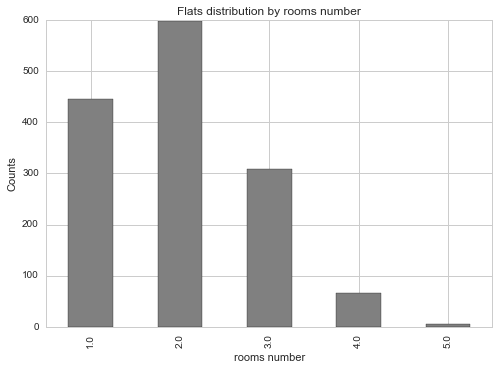

In [18]:
sns.set(style="whitegrid")
rooms_supply = data['rooms_number'].value_counts()
print(rooms_supply)
rooms_supply.sort_index().plot(kind = 'bar', title = "Flats distribution by rooms number", color = 'grey')
plt.xlabel('rooms number')
plt.ylabel('Counts')

**Вывод:** больше всего сдается двухкомнатных и однокомнатных квартир, 597 и 445 предложений, соответственно; сдается 309 трехкомнатных квартир; меньше всего сдается четырехкомнатных и пятикомнатных квартир, 67 и 6 предложений, соответственно.

In [19]:
#посмотрим, как распределены цены на квартиры с разным количеством комнат

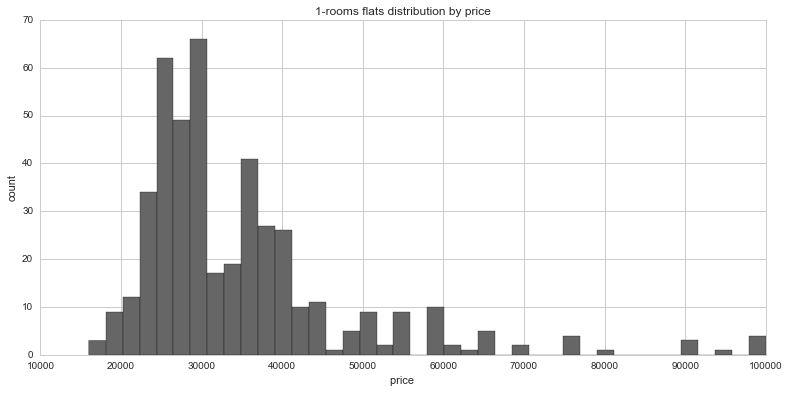

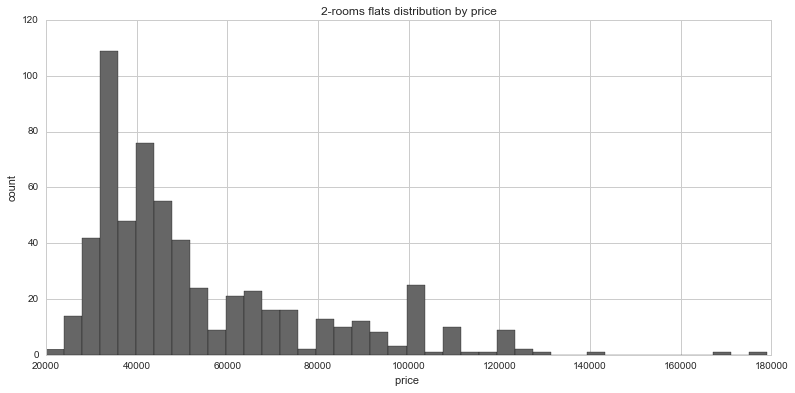

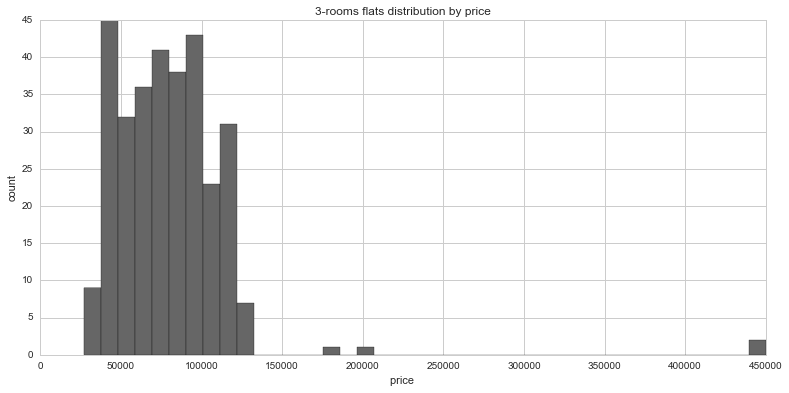

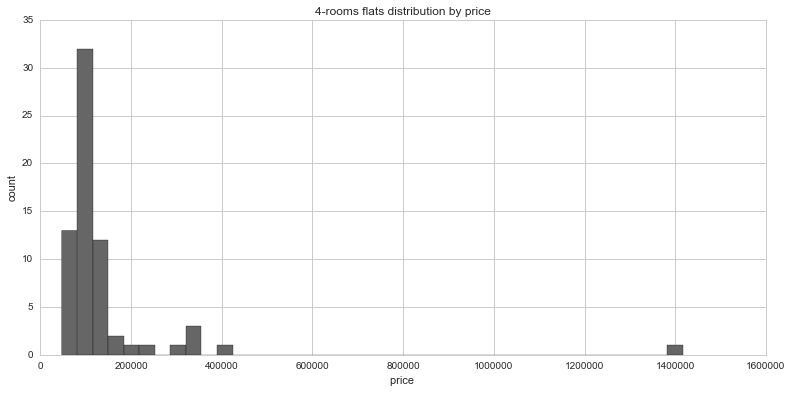

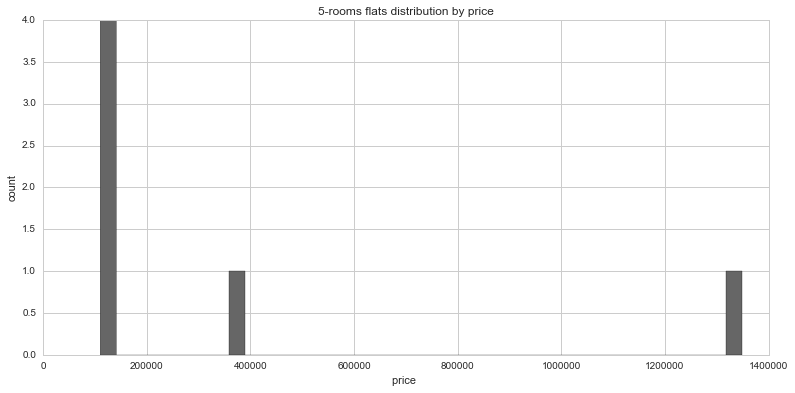

In [20]:
def draw_hists(i):
    f,ax=plt.subplots(figsize=(13,6))
    otw = data[data['rooms_number'] == i]['price']
    otw.index = range(len(otw))
    ax.hist(otw,bins=40,color='#666666')
    ax.set(title = str(i)+'-rooms flats distribution by price', xlabel='price ', ylabel='count')
    plt.show()

for i in range(1,6):
    draw_hists(i)

В качестве **вывода** о том, как распределены цены на квартиры с различным количеством комнат, выведем среднюю цену, стандартное отклонение, минимальную и максимальную цену для каждого типа квартир.

In [21]:
print('Summary for flats with different rooms numbers:\n')
for i in range(1,6):
    print('mean price for '+ str(i) + '-rooms flats = ' 
          + str(int(round(np.mean(data[data['rooms_number'] == i]['price']),0))))
    print('price std for '+ str(i) + '-rooms flats = ' 
          + str(int(round(np.std(data[data['rooms_number'] == i]['price']),0))))
    print('min price for '+ str(i) + '-rooms flats = ' 
          + str(int(round(np.min(data[data['rooms_number'] == i]['price']),0))))
    print('max price for '+ str(i) + '-rooms flats = ' 
          + str(int(round(np.max(data[data['rooms_number'] == i]['price']),0)))+'\n')

Summary for flats with different rooms numbers:

mean price for 1-rooms flats = 34856
price std for 1-rooms flats = 13654
min price for 1-rooms flats = 16000
max price for 1-rooms flats = 100000

mean price for 2-rooms flats = 53153
price std for 2-rooms flats = 24867
min price for 2-rooms flats = 20000
max price for 2-rooms flats = 179000

mean price for 3-rooms flats = 80916
price std for 3-rooms flats = 40974
min price for 3-rooms flats = 27000
max price for 3-rooms flats = 450000

mean price for 4-rooms flats = 140236
price std for 4-rooms flats = 172523
min price for 4-rooms flats = 47000
max price for 4-rooms flats = 1416790

mean price for 5-rooms flats = 365721
price std for 5-rooms flats = 450313
min price for 5-rooms flats = 110000
max price for 5-rooms flats = 1349324



In [22]:
#посмотрим, как распределены средние цены на квартиры с разным количеством комнат в зависимсти от района

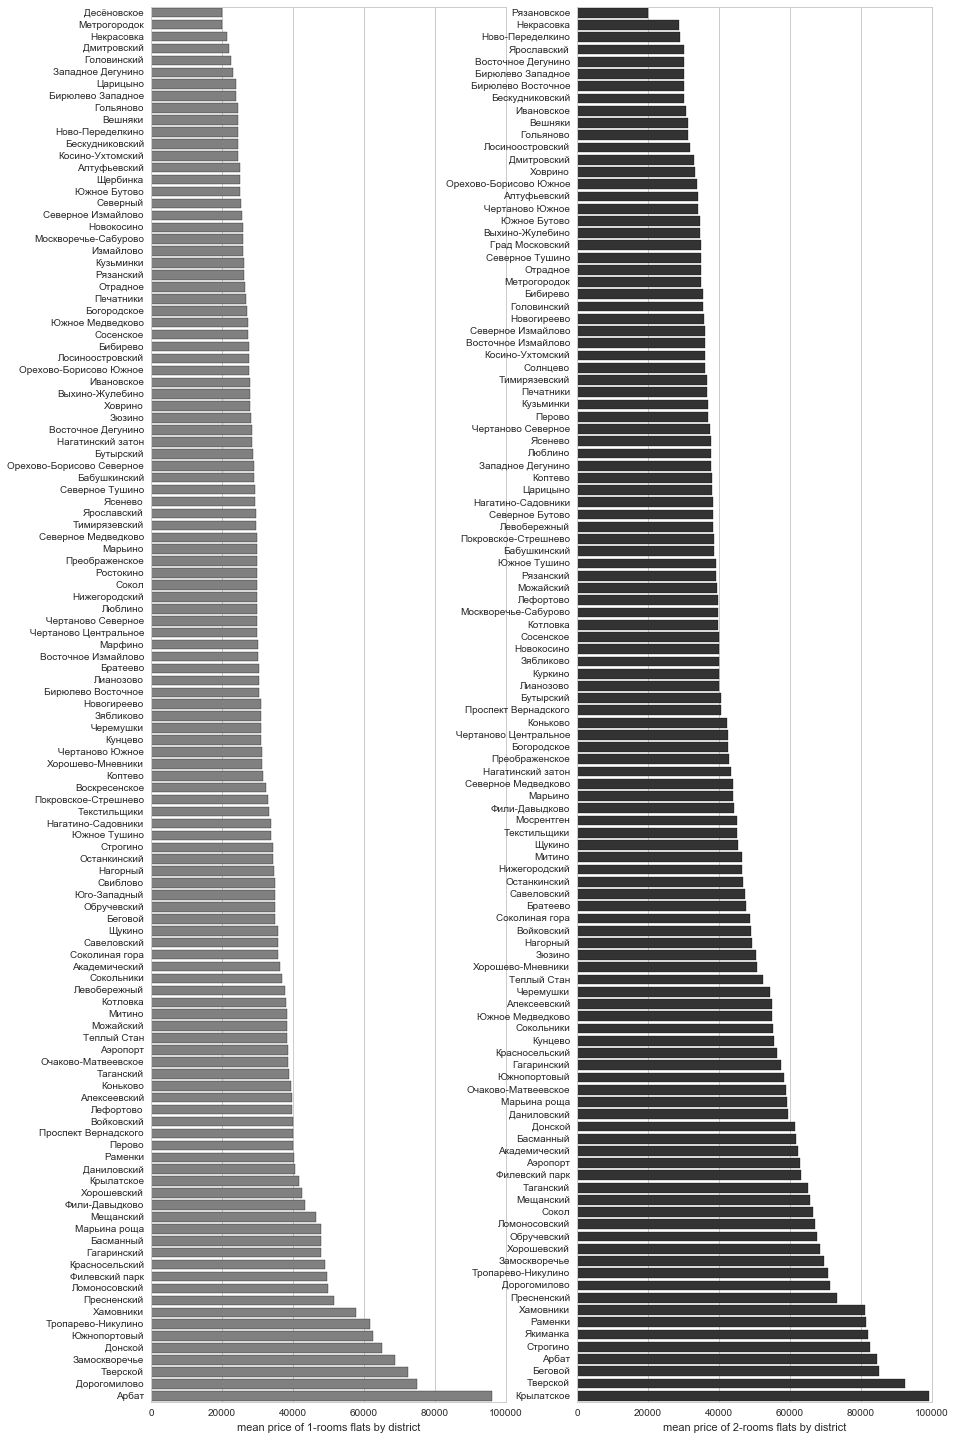

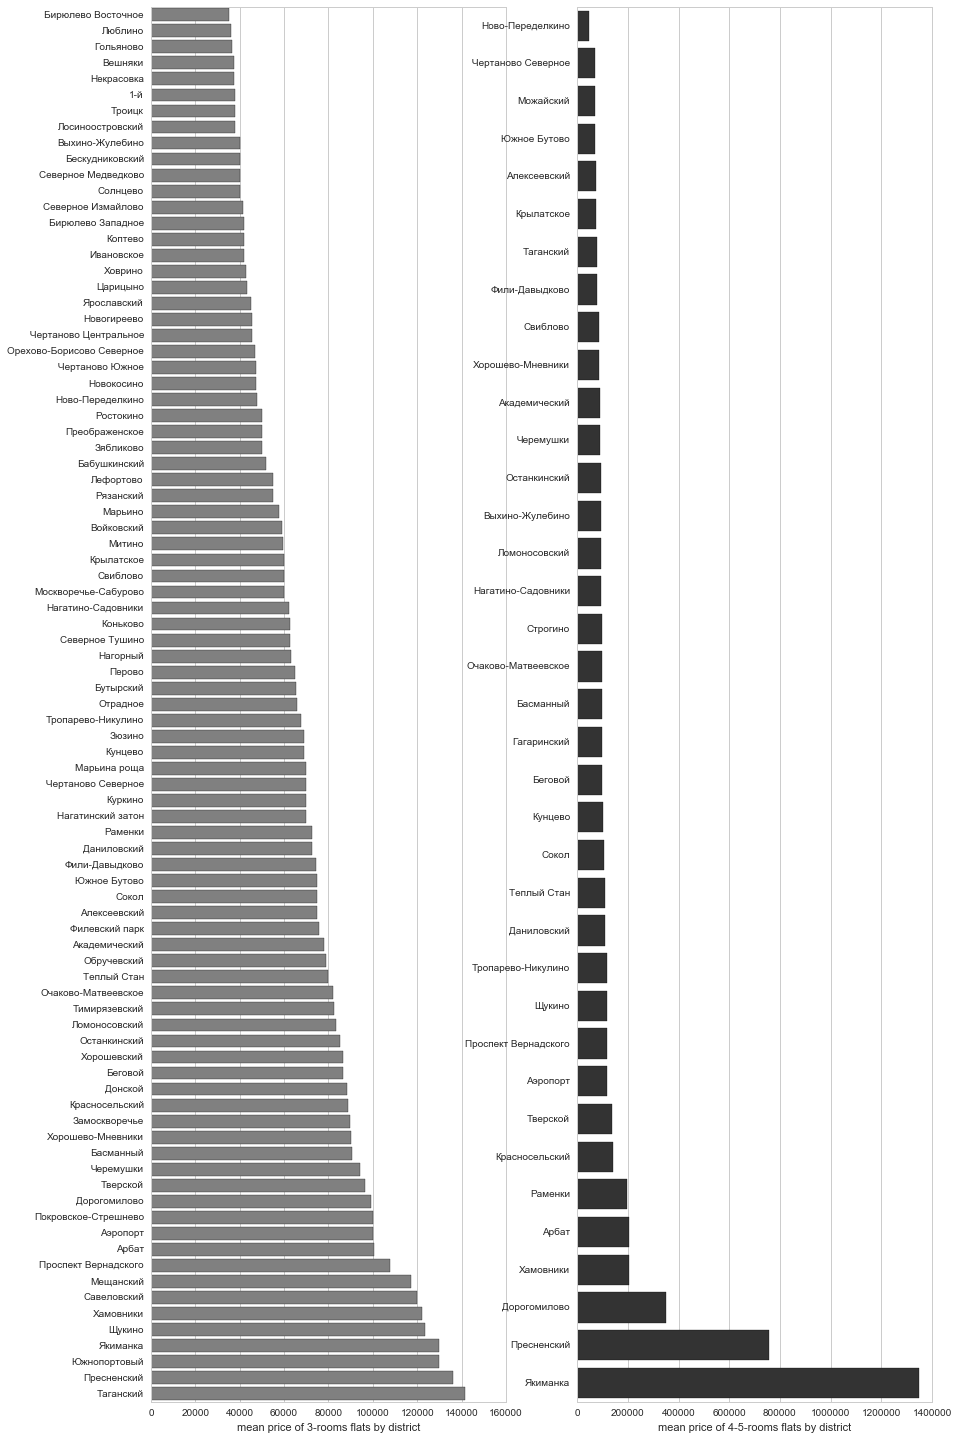

In [23]:
f, ax = plt.subplots(1,2,figsize=(14, 25))
res1=data[data['rooms_number']==1].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')
res2=data[data['rooms_number']==2].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')


sns.barplot(x="price_mean", y="district",data=res1, ax=ax[0],color="#808080")
sns.barplot(x="price_mean", y="district", data=res2, color="#333333",ax=ax[1])
ax[0].set(xlabel='mean price of 1-rooms flats by district', ylabel='')
ax[1].set(xlabel='mean price of 2-rooms flats by district', ylabel='')

f, ax = plt.subplots(1,2,figsize=(14, 25))
sns.set(style="whitegrid")
res3=data[data['rooms_number']==3].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')
res4=data[(data['rooms_number']==4)|(data['rooms_number']==5)].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')
sns.barplot(x="price_mean", y="district",data=res3, ax=ax[0],color="#808080")
sns.barplot(x="price_mean", y="district", data=res4, color="#333333",ax=ax[1])
ax[0].set(xlabel='mean price of 3-rooms flats by district', ylabel='')
ax[1].set(xlabel='mean price of 4-5-rooms flats by district', ylabel='')

В качестве **вывода** выделим 3 самых дорогих и 3 самых дешевых района по каждому типу квартир


In [24]:
def cheap_expensive(i, res):
    cheap_district = res.head(3)['district']
    cheap_district.index = range(len(cheap_district))
    cheap_price = res.head(3)['price_mean']
    cheap_price.index = range(len(cheap_price))
    expensive_district = res.tail(3)['district']
    expensive_district.index = range(len(expensive_district))
    expensive_price = res.tail(3)['price_mean']
    expensive_price.index = range(len(expensive_price))
    print('\nThe cheapest districts with ' + i +'-rooms flats are:\n')
    for j in range(3):
        print(str(cheap_district[j]) + '; mean price is ' + str(int(round(cheap_price[j],0))))
    print('\nThe most expensive districts with ' + i +'-rooms flats are:\n')
    for j in range(3):
        print(str(expensive_district[j]) + '; mean price is ' + str(int(round(expensive_price[j],0))))
cheap_expensive( '1', res1)
cheap_expensive( '2' , res2)
cheap_expensive( '3', res3)
cheap_expensive( '4or5', res4)


The cheapest districts with 1-rooms flats are:

Десёновское; mean price is 20000
Метрогородок; mean price is 20000
Некрасовка; mean price is 21500

The most expensive districts with 1-rooms flats are:

Тверской; mean price is 72500
Дорогомилово; mean price is 75000
Арбат; mean price is 96000

The cheapest districts with 2-rooms flats are:

Рязановское; mean price is 20000
Некрасовка; mean price is 28667
Ново-Переделкино; mean price is 29000

The most expensive districts with 2-rooms flats are:

Беговой; mean price is 85000
Тверской; mean price is 92362
Крылатское; mean price is 99000

The cheapest districts with 3-rooms flats are:

Бирюлево Восточное; mean price is 35000
Люблино; mean price is 36000
Гольяново; mean price is 36667

The most expensive districts with 3-rooms flats are:

Южнопортовый; mean price is 130000
Пресненский; mean price is 136267
Таганский; mean price is 141667

The cheapest districts with 4or5-rooms flats are:

Ново-Переделкино; mean price is 47000
Чертаново Сев

In [25]:
#посмотрим на распределение бинарных признаков

Bath facilities


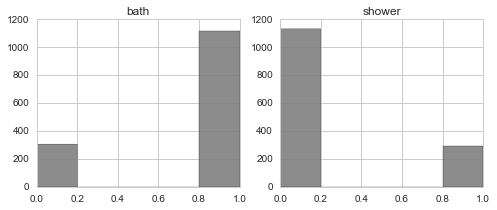

Equipment facilities


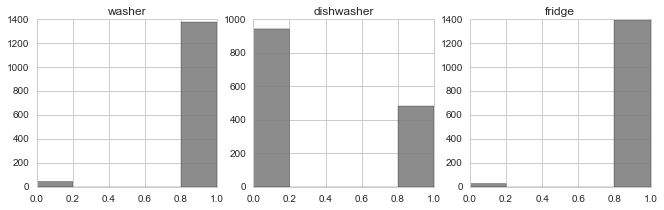

Comunication facilities


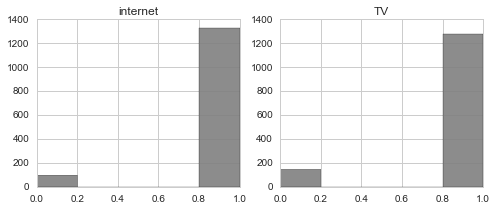

Cohabitant facilities


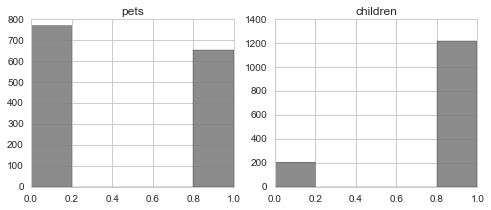

Furniture facilities


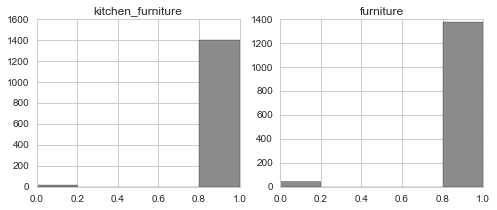

Area facilities


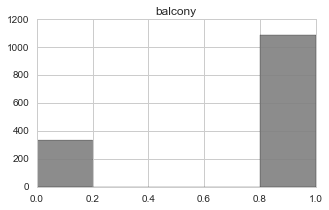

In [26]:
def draw_bin_hists(label, names):
    print(label)
    plt.figure(figsize=(2 + 3 * len(names), 3))
    for i in range(len(names)):
        plt.subplot(1, len(names), i + 1, title=names[i])
        plt.hist(data[names[i]], bins=5, color='#808080',alpha=0.9)
    plt.show()
    
draw_bin_hists('Bath facilities', ['bath', 'shower'])
draw_bin_hists('Equipment facilities', ['washer', 'dishwasher', 'fridge'])
draw_bin_hists('Comunication facilities', ['internet', 'TV'])
draw_bin_hists('Cohabitant facilities', ['pets', 'children'])
draw_bin_hists('Furniture facilities', ['kitchen_furniture', 'furniture'])
draw_bin_hists('Area facilities', ['balcony'])


**Заметим**, что почти во всех квартирах(>= 1200 шт, напомним, что всего квартир 1424) есть стиральная машинка, холодильник, интернет, телевизор, мебель(в т.ч. кухонная), а также разрешено заселение с детьми.Более чем в 1000 квартирах есть ванна и балкон, также более чем в 1000 квартирах нет душевой кабины. Заселение с животными разрешено примерно в половине случаев, но все же чуть чаще(примерно в 750 случаях из 1424) оно запрещено. Посудомоечная машинка встречается примерно в каждой третьей квартире.

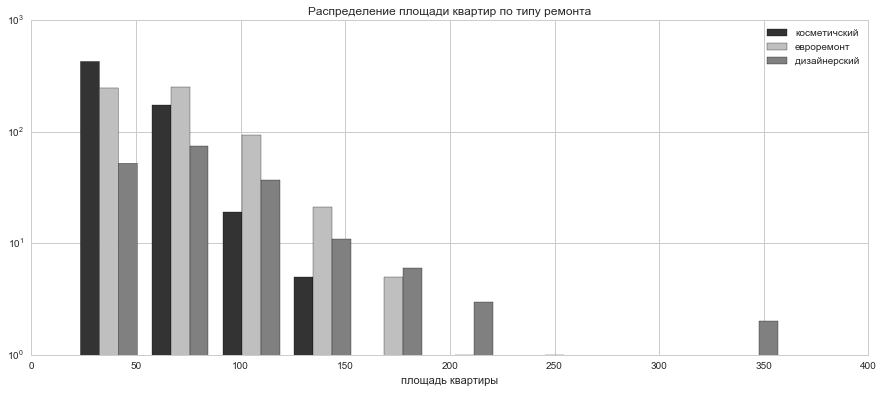

In [27]:
#посмотрим на распределение площади квартир по типу ремонта
f, ax = plt.subplots(figsize=(15, 6))
plt.hist([data[data['condition']=='косметический']['square'],
          data[data['condition']=='евроремонт']['square'],
          data[data['condition']=='дизайнерский']['square']],
         color=['#333333','#bfbfbf','#808080'],
         label=['косметичский','евроремонт','дизайнерский'],bins=10,
        log = True)#применим логарифмическую шкалу для лучшего отображения данных

ax.set_title(u'Распределение площади квартир по типу ремонта')
ax.legend(loc='upper right')
plt.xlabel('площадь квартиры')

Исходя из данных можно сделать следующий **вывод:** в квартирах площадью до 50 кв. метров преобладает косметический тип ремонта(самый дешевый тип); в квартирах площадью более 50 кв. метров, но менее 150 кв. метров преобладает евроремонт; в квартирах площадью более 150 кв. метров преобладает дизайнерский тип ремонта(самый дорогой тип ремонта), а косметического ремонта не остается.
Это означает, что чем больше метраж квартиры, тем чаще встречается более дорогой(по оношению к косметическому) тип ремонта.

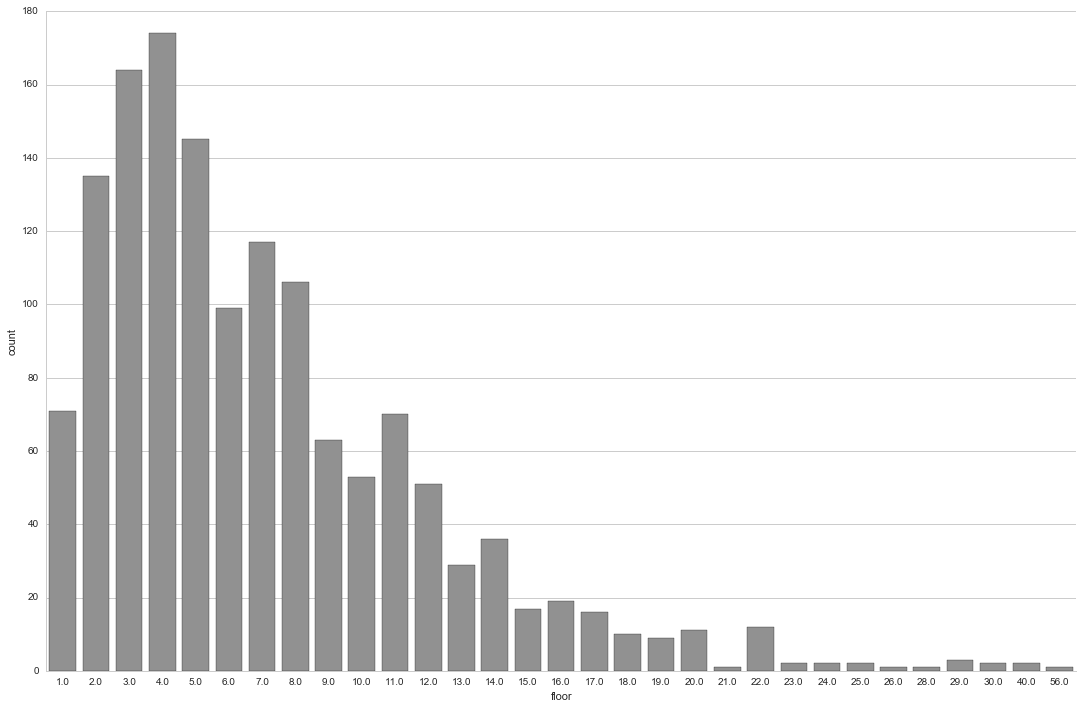

In [28]:
#посмотрим на распределение квартир по этажам
sns.factorplot(x='floor', data=data, kind="count", color=sns.light_palette("black")[2],
 size=10, aspect=1.5)


**Корреляция**
================================

Выясним, с какими признаками коррелирует цена квартиры

In [29]:
#выведем еще раз все колонки, содержащиеся в таблице

In [30]:
print(list(data.columns))

['price', 'district', 'metro_station', 'time_to_centre', 'distance_to_metro', 'square', 'floor', 'max_floors', 'rooms_number', 'condition', 'bath', 'shower', 'washer', 'dishwasher', 'internet', 'TV', 'pets', 'children', 'furniture', 'balcony', 'kitchen_furniture', 'fridge']


In [31]:
#присвоим каждому типу ремонта в столбце condition значение от 1 до 3:
#1-косметический,2-евроремонт,3-дизайнерский
def level(condition):
    return 1 if  condition == 'косметический'\
            else 2 if condition == 'евроремонт' else 3

data['condition'] = data['condition'].apply(level)


In [32]:
#выберем те признаки, корреляцию которых с ценой можно посчитать
features = ['time_to_centre', 'distance_to_metro', 'square', 'floor',
            'max_floors', 'rooms_number', 'condition', 'bath', 'shower', 'washer',
            'dishwasher', 'internet', 'TV', 'pets', 'children', 'furniture', 'balcony',
            'kitchen_furniture', 'fridge']

In [33]:
#выведем всевозможные корреляции с ценой
for t in features:
    print("corr (price," + t + ') = ' + str(stats.pearsonr(data['price'],data[t])[0]))

corr (price,time_to_centre) = -0.305723091701
corr (price,distance_to_metro) = -0.110984269458
corr (price,square) = 0.751484644367
corr (price,floor) = 0.305246414157
corr (price,max_floors) = 0.312336538839
corr (price,rooms_number) = 0.436424409753
corr (price,condition) = 0.350543961451
corr (price,bath) = -0.0389606298559
corr (price,shower) = 0.315159629382
corr (price,washer) = 0.013662779194
corr (price,dishwasher) = 0.354515975685
corr (price,internet) = 0.0117052726844
corr (price,TV) = 0.0491570789131
corr (price,pets) = 0.0139287903936
corr (price,children) = -0.00682220864146
corr (price,furniture) = 0.0127581296032
corr (price,balcony) = -0.151599092734
corr (price,kitchen_furniture) = -0.0118550703543
corr (price,fridge) = -0.0198743157167


In [34]:
#отберем значимые корреляции с ценой
print("Significant correlation coefficients(|corr| >= 0.1):\n")
for t in features:
    if abs(stats.pearsonr(data['price'],data[t])[0]) >= 0.1:
        print("corr (price," + t + ') = ' + str(stats.pearsonr(data['price'],data[t])[0]))

Significant correlation coefficients(|corr| >= 0.1):

corr (price,time_to_centre) = -0.305723091701
corr (price,distance_to_metro) = -0.110984269458
corr (price,square) = 0.751484644367
corr (price,floor) = 0.305246414157
corr (price,max_floors) = 0.312336538839
corr (price,rooms_number) = 0.436424409753
corr (price,condition) = 0.350543961451
corr (price,shower) = 0.315159629382
corr (price,dishwasher) = 0.354515975685
corr (price,balcony) = -0.151599092734


In [35]:
#посмотрим на все возможные корреляции между признакми в графическом представлении (для наглядности)

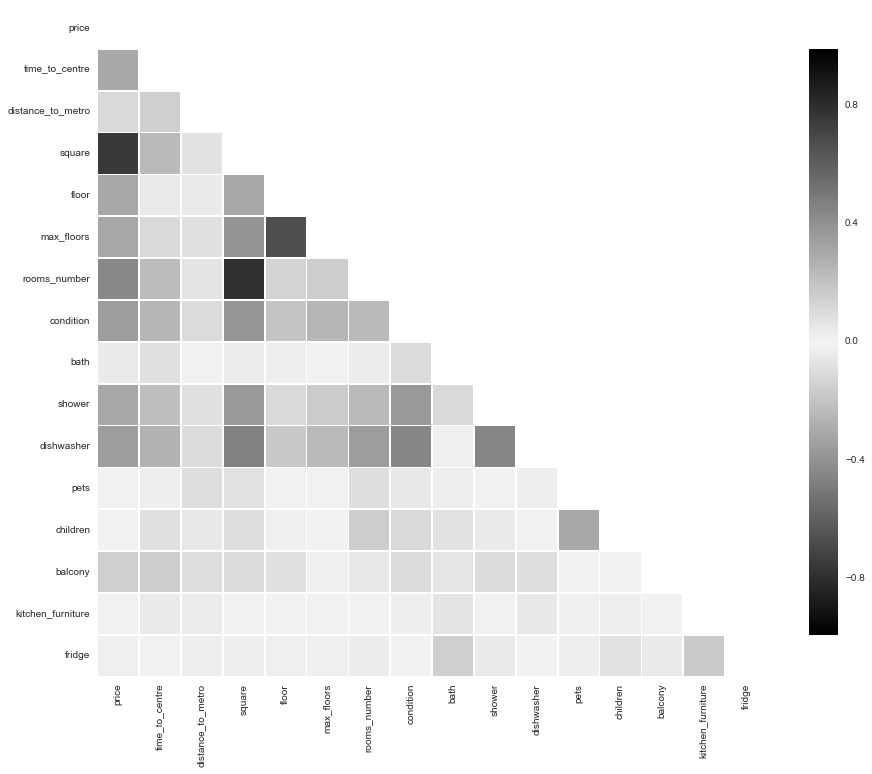

In [36]:
f, ax = plt.subplots(figsize=(15, 15)) 

corr=data[['price','time_to_centre', 'distance_to_metro', 'square', 'floor','max_floors',
           'rooms_number', 'condition', 'bath', 'shower','dishwasher', 'pets',
           'children', 'balcony','kitchen_furniture', 'fridge']].corr()

sns.set(style="white")
 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(240, 100, s=0, l=0, sep=1, n=10, center='light', as_cmap=True)
sns.heatmap(corr, vmax=.99,cmap=cmap,mask=mask,square=True,linewidths=.7, cbar_kws={"shrink": .7}, ax=ax)

**Поиск интересных инсайтов**
================================

Хочется посмотреть подробнее корреляцию уровня цен с площадью квартиры, расстоянием до метро и временем до центра(непрерывные признаки).

В начале посмотрим на зависимость цены от этих параметров без какого либо разделения квартир.

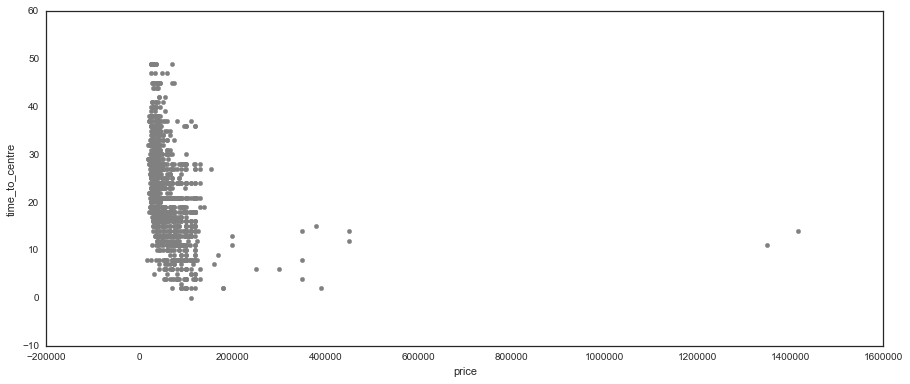

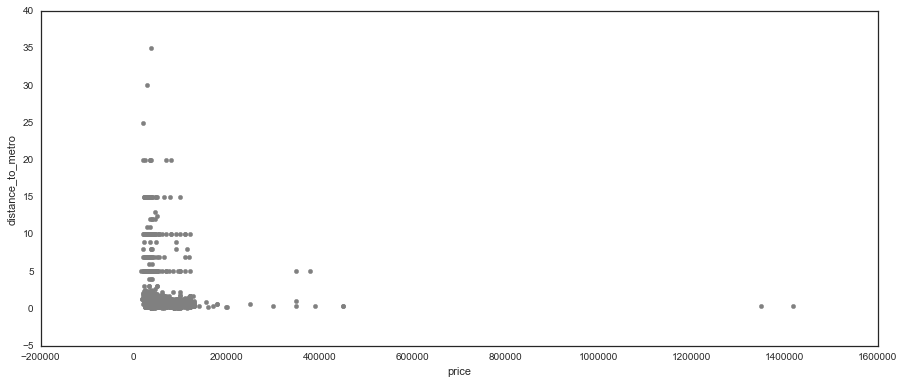

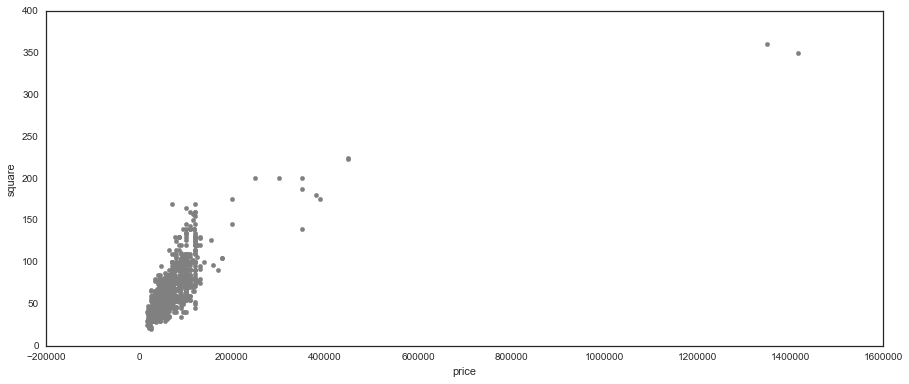

In [37]:
def plot_corr(x,y,name):
    f,ax=plt.subplots(figsize=(15, 6))
    plt.scatter(x,y,color='#808080')
    plt.ylabel(name)
    plt.xlabel('price')
    plt.show()
g=['time_to_centre', 'distance_to_metro', 'square',]
for i in g:
    plot_corr(data['price'],data[i],i)


Из последнего графика видно, что корреляция цены с площадю очень высока.

Однако, трудно что-то понять из первых двух графиков.Поэтому, сделаем следующие преобразования.

Во-первых, рассмотрим отдельно квартиры цена которых менее 150000 и более 150000(более или равна)

Во-вторых, рассмотрим отдельно квартиры которые находятся в шаговой доступности(расстояние до метро не более 2 км) и до которых надо добираться от метро на транспорте(расстояние до метро более 2 км).

Заметим, что для высокой арендной платы (price >=150000) расстояние до метро не привышает 2 км (исключние - две квартиры, расстояние до метро для которых равно 5 км)

In [38]:
data[(data['price']>=150000)&(data['distance_to_metro']>2)]

,price,district,metro_station,time_to_centre,distance_to_metro,square,floor,max_floors,rooms_number,condition,...,washer,dishwasher,internet,TV,pets,children,furniture,balcony,kitchen_furniture,fridge
1417,350000,Раменки,Парк Победы,14,5.0,187.0,14.0,53.0,4.0,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1418,380000,Раменки,Университет,15,5.0,180.0,14.0,38.0,5.0,3,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


Учиывая все вышеперечисленные замечания разобьем данные на 3 группы:

1 группа: квартиры, арендная плата которых больше или равна 150000 в месяц

2 группа: квартиры, арендная плата которых меньше 150000 в месяц и метро находится в пешей доступности(не более 2 км)

3 группа: квартиры, арендная плата которых меньше 150000 в месяц и до которых надо добираться от метро на транспорте(расстояние до метро более 2 км)

In [39]:
#1
data_high_near=data[data['price']>=150000]
#2
data_low_near=data[(data['price']<150000)&(data['distance_to_metro']<=2)]
#3
data_low_far=data[(data['price']<150000)&(data['distance_to_metro']>2)]
                   

In [40]:
def plot_(x,y,name):
    f,ax=plt.subplots(figsize=(15, 9))
    plt.scatter(x,y,color='#333333',edgecolors='black',s=np.pi*50)
    plt.ylabel(name)
    plt.show()

**1) **Посмотрим на зависимость уровня цен от площади квартиры, расстояния до метро и времени до центра для квартир из 1 группы(квартиры, арендная плата которых больше или равна 150000 в месяц)

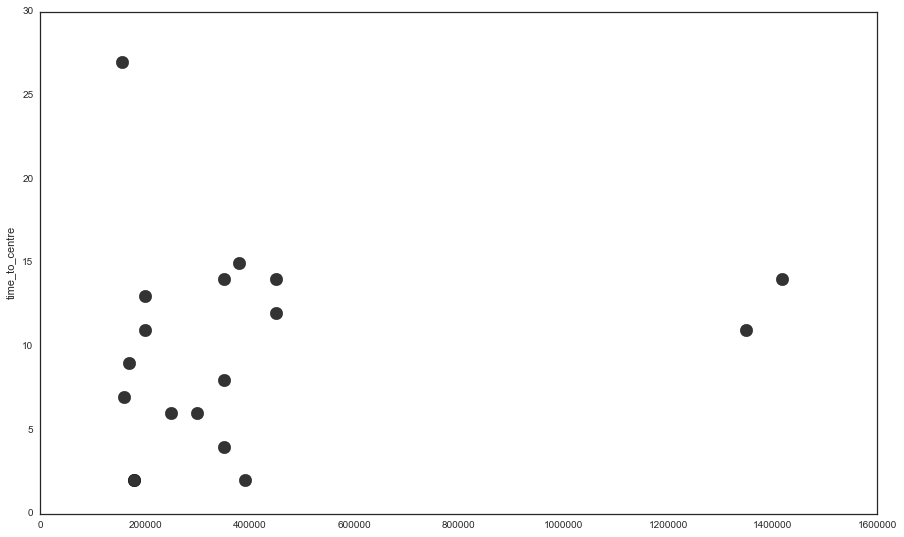

corr (price, time_to_centre )= 0.154861445488


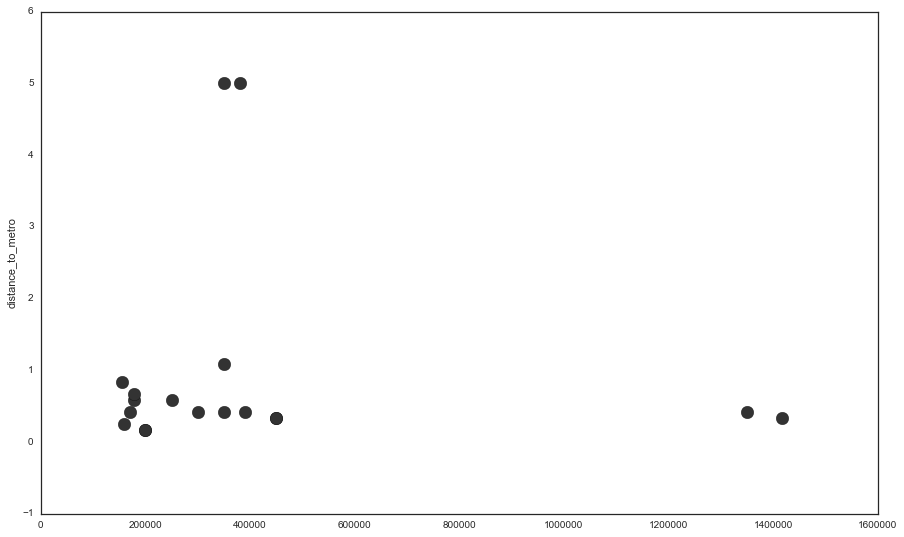

corr (price, distance_to_metro )= -0.0609392280389


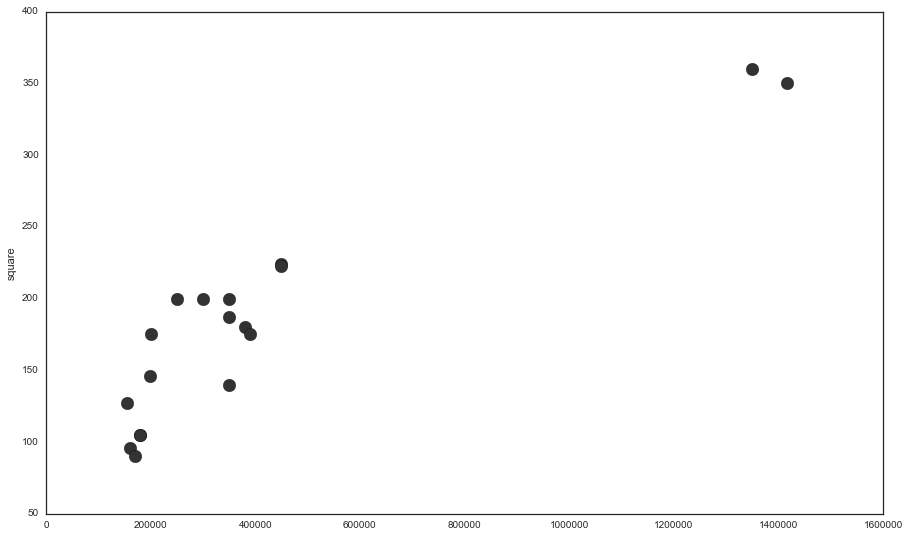

corr (price, square )= 0.916544456601


In [41]:
#1
for i in g:
    plot_(data_high_near['price'],data_high_near[i],i)
    print('corr (price,',i,')=',stats.pearsonr(data_high_near['price'],data_high_near[i])[0])

**2) **Посмотрим на зависимость уровня цен от площади квартиры, расстояния до метро и времени до центра для квартир из 2 группы(квартиры, арендная плата которых меньше 150000 в месяц и метро находится в пешей доступности)

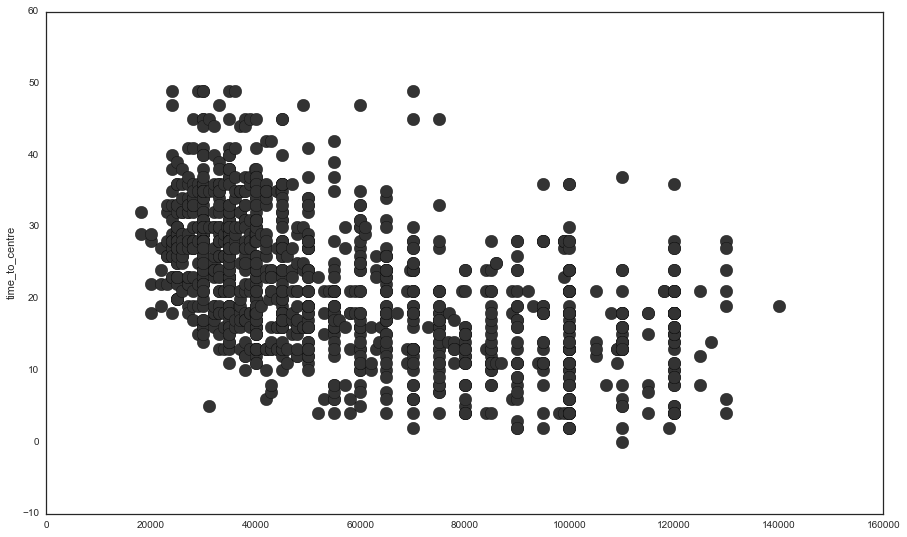

corr (price, time_to_centre )= -0.503133364977


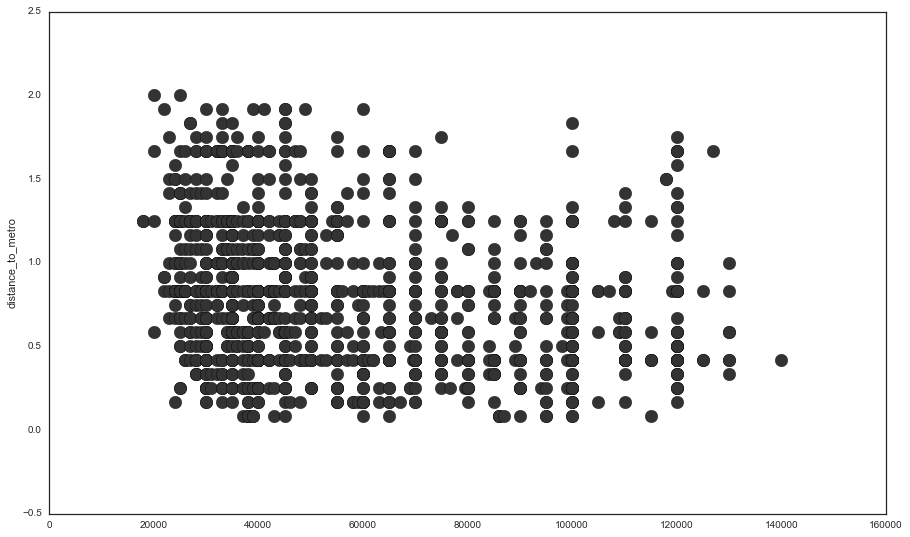

corr (price, distance_to_metro )= -0.224570361749


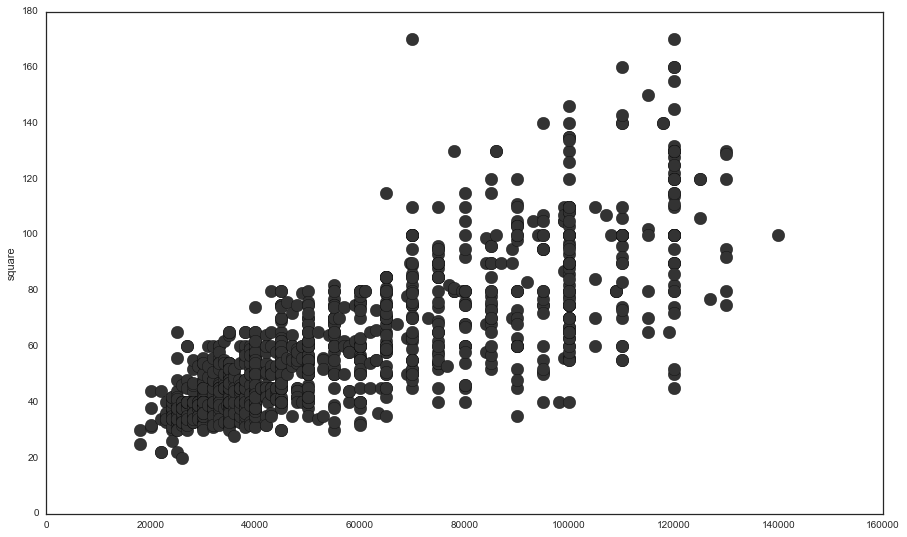

corr (price, square )= 0.788469665108


In [42]:
#2
for i in g:
    plot_(data_low_near['price'],data_low_near[i],i)
    print('corr (price,',i,')=',stats.pearsonr(data_low_near['price'],data_low_near[i])[0])


3) Посмотрим на зависимость уровня цен от площади квартиры, расстояния до метро и времени до центра для квартир из 3 группы
(квартиры, арендная плата которых меньше 150000 в месяц и до метро нужно добираться на транспорте)

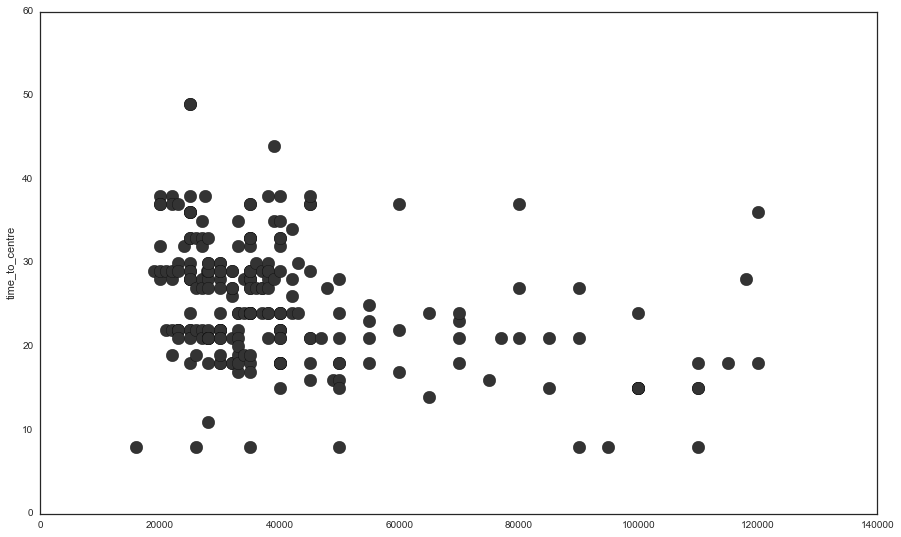

corr (price, time_to_centre )= -0.341870916753


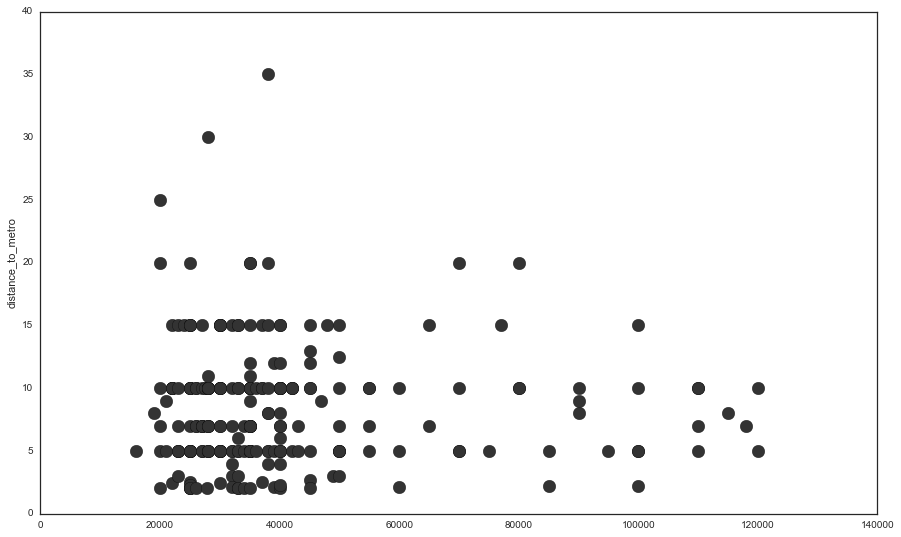

corr (price, distance_to_metro )= -0.0228059576739


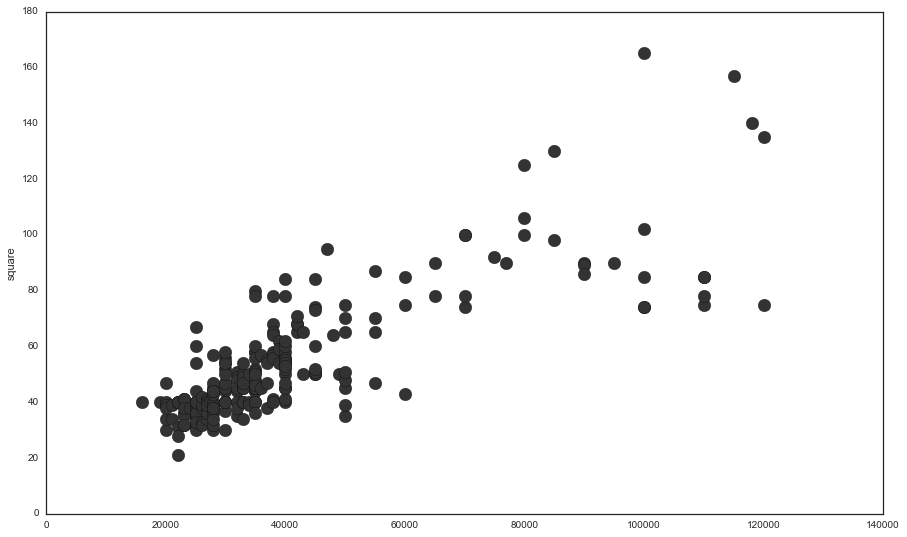

corr (price, square )= 0.816144150083


In [43]:
#3
for i in g:
    plot_(data_low_far['price'],data_low_far[i],i)
    print('corr (price,',i,')=',stats.pearsonr(data_low_far['price'],data_low_far[i])[0])



**Выводы**:

1) Для квартир из 1 группы корреляция цены с расстоянием до метро практически отсутствует, а корреляция с временем до центра мала.

2) Для квартир из 2 группы наблюдается самая значительная(из всех групп) кореляция цены с расстоянием до метро и временем до центра.

3) Для квартир из 3 группы корреляция цены с расстоянием до метро мала, а корреляция с временем до центра больше чем для 1 группы, но меньше чем для 2.

Заметим также, что для всех трёх групп наблюдается значимая корреляция цены с площадью квартиры(0.8 - 0.9).

**Шкалирование**
================================

Так как размерность данных сильно отличается, приведем все значения при помощи процедуры minmax к значениям, лежащим в интервале [0,1]

In [44]:
from sklearn import preprocessing  
def min_max_scaler(columns):
    min_max_scaler = preprocessing.MinMaxScaler()
    data[columns]=min_max_scaler.fit_transform(data[columns].reshape(-1,1))
for_normalizing=['price','time_to_centre','distance_to_metro', 'square', 'floor',
                 'max_floors', 'rooms_number','condition'] 
for i in for_normalizing:
    min_max_scaler(i)
    


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
#итог
data.head()

,price,district,metro_station,time_to_centre,distance_to_metro,square,floor,max_floors,rooms_number,condition,...,washer,dishwasher,internet,TV,pets,children,furniture,balcony,kitchen_furniture,fridge
0,0.000000,Раменки,Киевская,0.163265,0.140811,0.058824,0.200000,0.202703,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.001428,Головинский,Речной вокзал,0.591837,0.033413,0.029412,0.000000,0.040541,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.001428,Новокосино,Новокосино,0.653061,0.033413,0.014706,0.000000,0.013514,0.0,0.5,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.002142,Некрасовка,Выхино,0.591837,0.226730,0.058824,0.090909,0.202703,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.002856,Бутырский,Тимирязевская,0.367347,0.014320,0.032353,0.072727,0.040541,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
